In [15]:
library(haven)
library(ggplot2)
library(gridExtra)


In [16]:
dta <- read_dta("gerber_generalizability/PublicReplicationData.dta")
print(colnames(dta))

 [1] "resid"                 "state"                 "treat_overall"        
 [4] "treat_sticker_over55"  "treat_sticker_under55" "treat_ballot_secrecy" 
 [7] "treat_disappoint"      "treat_purl"            "treat_purl_postcard"  
[10] "age"                   "race"                  "gender"               
[13] "married"               "voted10"               "voted12"              
[16] "voted14"               "under55"               "t6"                   
[19] "t3"                    "t2"                    "t3_0"                 
[22] "t3_1"                  "t3_2"                  "t2_0"                 
[25] "t2_1"                  "d_race_black"          "d_race_hisp"          
[28] "d_race_other"          "d_mar_married"         "d_mar_unknown"        
[31] "d_gend_female"         "d_st_GA"               "d_st_LA"              
[34] "d_st_MI"               "d_st_NC"               "d_st_TX"              
[37] "hhid"                  "hhsize"                "hhsize1"              

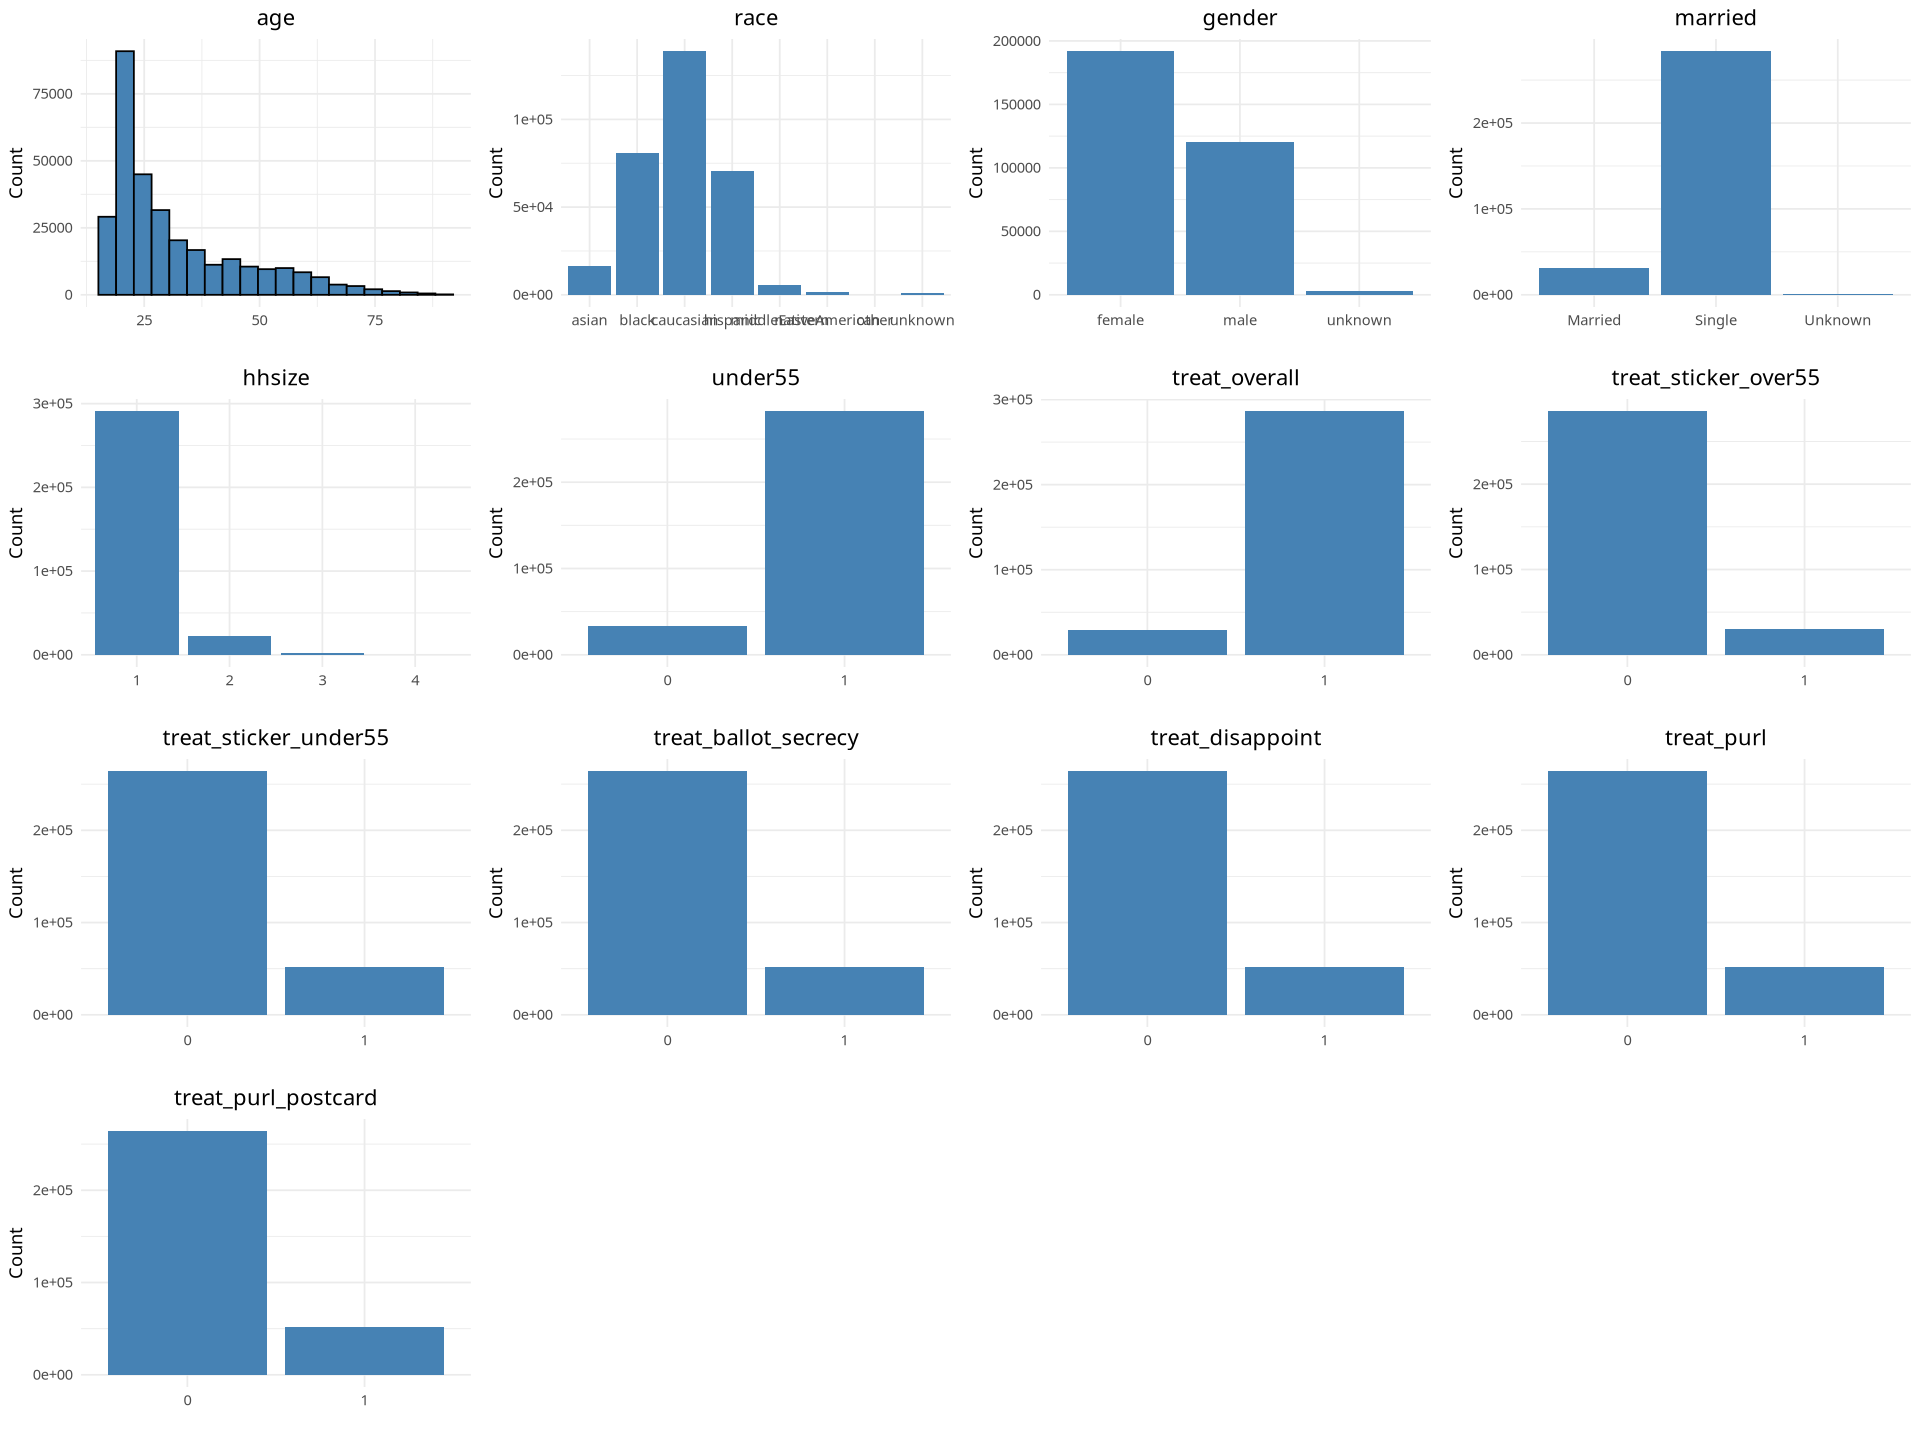

In [19]:
options(repr.plot.width = 16, repr.plot.height = 12)

variables_to_plot <- c(
    'age', 'race', 'gender', 'married', 'hhsize', 'under55',
    'treat_overall', 'treat_sticker_over55', 'treat_sticker_under55',
    'treat_ballot_secrecy', 'treat_disappoint', 'treat_purl', 'treat_purl_postcard'
)

plot_list <- lapply(variables_to_plot, function(var) {
    var_data <- dta[[var]]
    var_data <- var_data[!is.na(var_data)]
    
    if (length(unique(var_data)) < 10) {
        freq_table <- as.data.frame(table(var_data))
        colnames(freq_table) <- c("value", "count")
        ggplot(freq_table, aes(x = value, y = count)) +
            geom_bar(stat = "identity", fill = "steelblue") +
            labs(title = var, x = "", y = "Count") +
            theme_minimal() +
            theme(plot.title = element_text(hjust = 0.5))
    } else {
        df_plot <- data.frame(value = var_data)
        ggplot(df_plot, aes(x = value)) +
            geom_histogram(bins = 20, fill = "steelblue", color = "black") +
            labs(title = var, x = "", y = "Count") +
            theme_minimal() +
            theme(plot.title = element_text(hjust = 0.5))
    }
})

grid.arrange(grobs = plot_list, ncol = 4)
